Retail Sales Performance Dashboard

This project analyzes sales data from a Superstore to understand:
- Best-selling products
- Region-wise performance
- Monthly trends
- Profits across categories

Tools Used: Python, Pandas, Matplotlib, Seaborn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(filepath_or_buffer = "superstore_data.csv",encoding='ISO-8859-1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


Data Cleaning

- Handled missing values and duplicates
- Converted `Order Date` and `Ship Date` to datetime format

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [12]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [16]:
df = df.drop_duplicates()

In [18]:
df.head()
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [22]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Exploratory Data Analysis (EDA)
✅ Overall Sales and Profit

In [24]:
print("Total Sales:", df['Sales'].sum())
print("Total Profit:", df['Profit'].sum())

Total Sales: 2297200.8603000003
Total Profit: 286397.0217


Top 10 Products by Sales

In [26]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_products)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

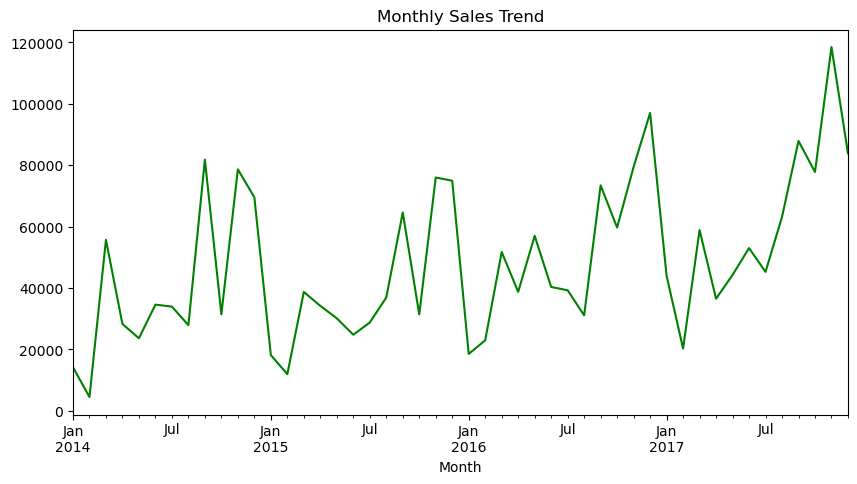

In [28]:
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='line', figsize=(10,5), title='Monthly Sales Trend',color="green")

<Axes: title={'center': 'Sales by Region'}, xlabel='Region'>

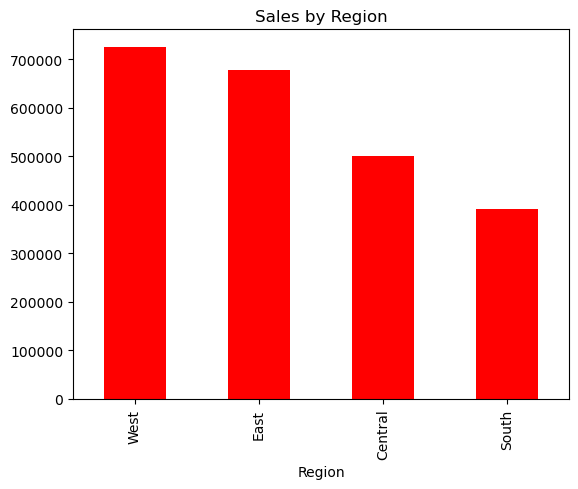

In [30]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

region_sales.plot(kind='bar', title='Sales by Region',color="Red")

<Axes: title={'center': 'Sales and Profit by Category'}, xlabel='Category'>

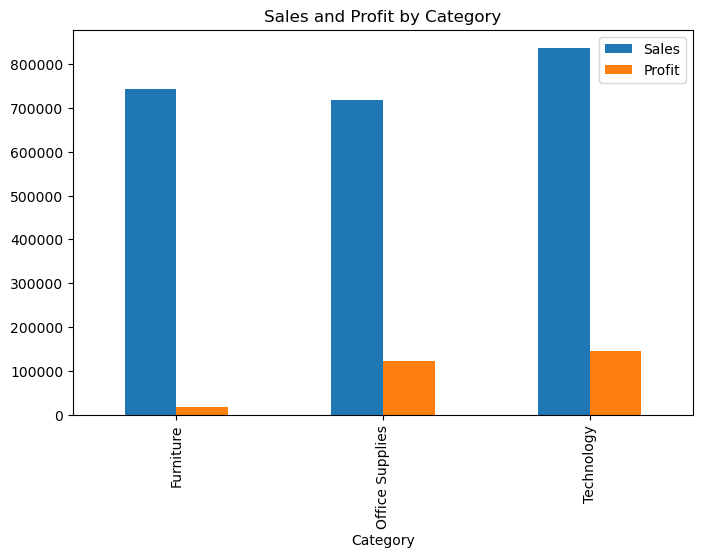

In [32]:
category_perf = df.groupby('Category')[['Sales', 'Profit']].sum()

category_perf.plot(kind='bar', figsize=(8,5), title='Sales and Profit by Category')

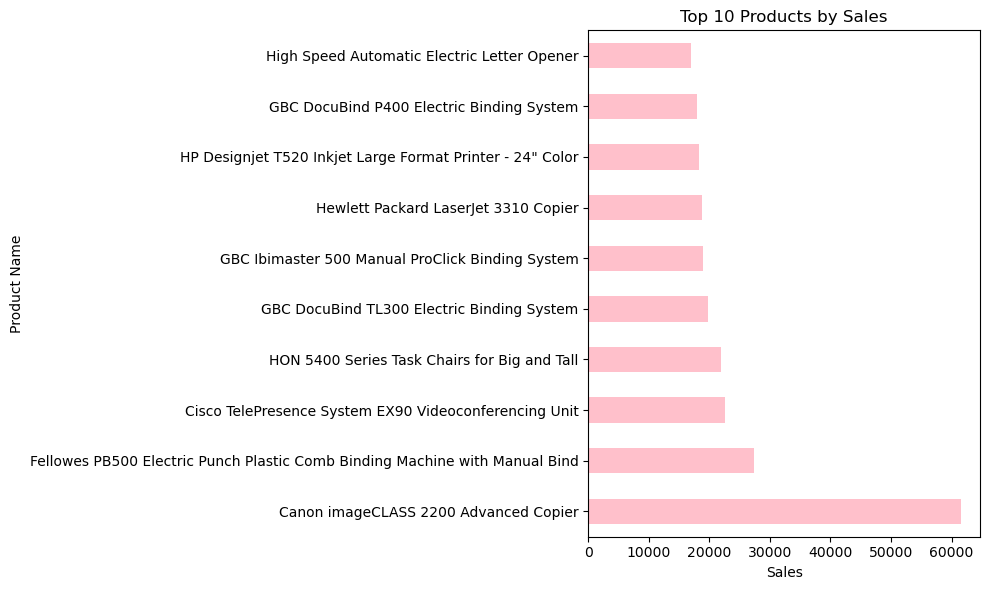

In [61]:
import matplotlib.pyplot as plt

# Start with a new figure
plt.figure(figsize=(10,6))

# Your plot code here
top_products.plot(kind='barh', color='pink')

# Add titles and labels
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')

# Ensure layout fits
plt.tight_layout()

# Save the figure (ensure correct path)
plt.savefig('C:\\Users\\gates\\Desktop\\data_analyst_mini_project\\superstore\\monthly_sales.png')

# Show the plot in notebook
plt.show()


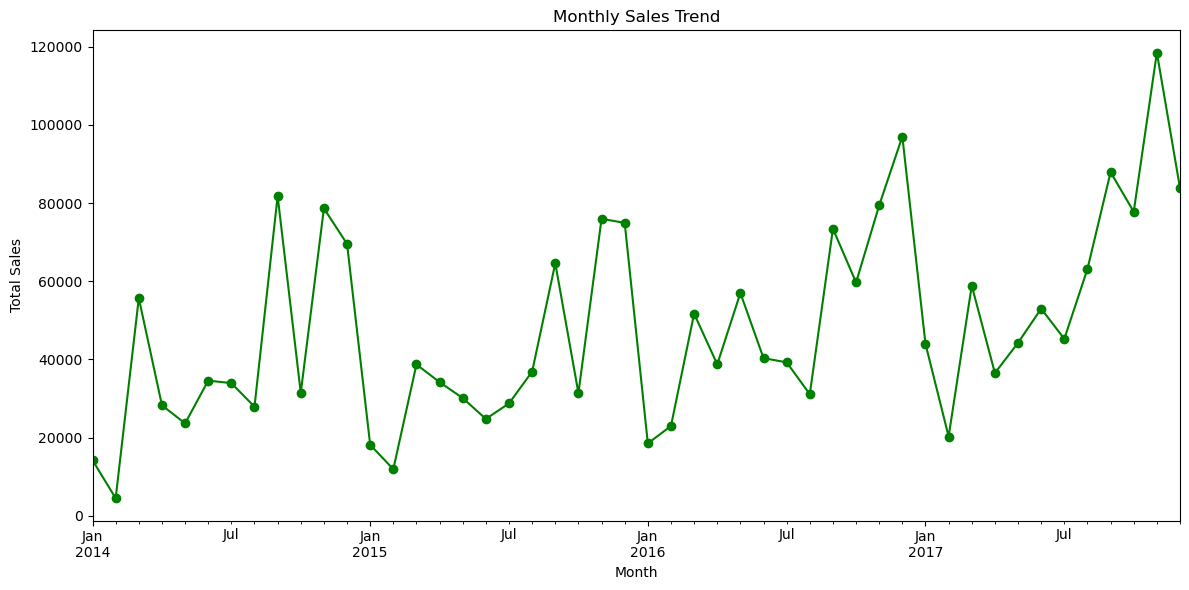

In [55]:
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('monthly_sales_trend.png')
plt.show()

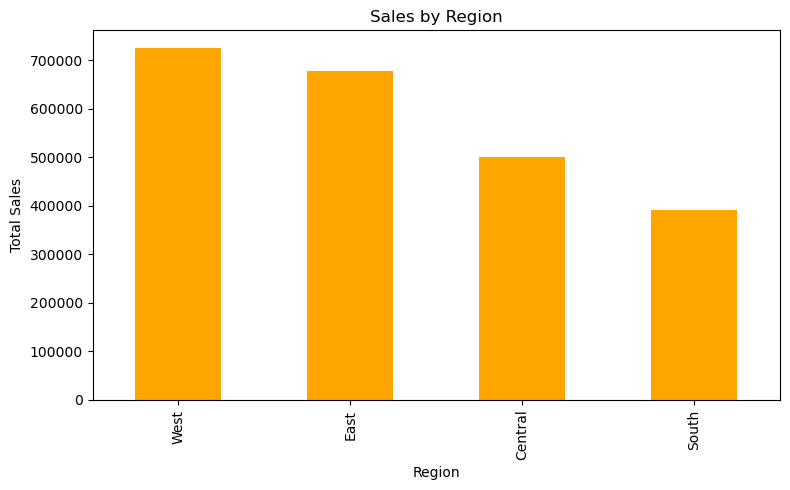

In [59]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar', color='orange')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('sales_by_region.png')
plt.show()

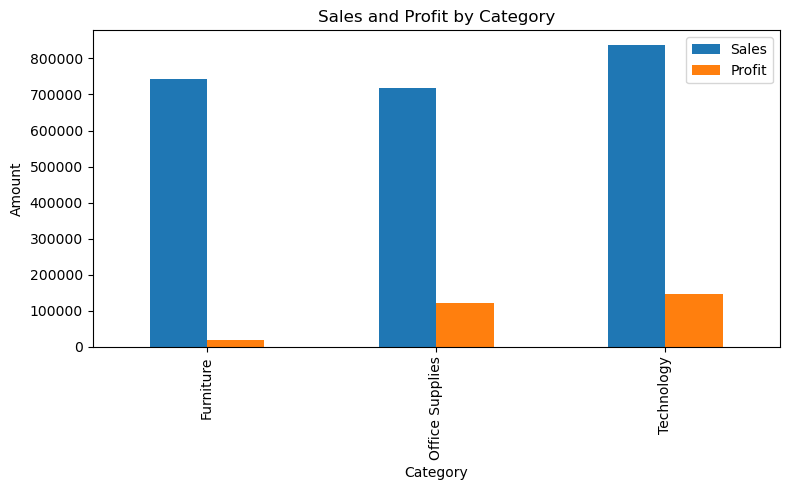

In [65]:
category_perf = df.groupby('Category')[['Sales', 'Profit']].sum()
category_perf.plot(kind='bar', figsize=(8, 5))
plt.title('Sales and Profit by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.tight_layout()
plt.savefig('sales_profit_by_category.png')
plt.show()

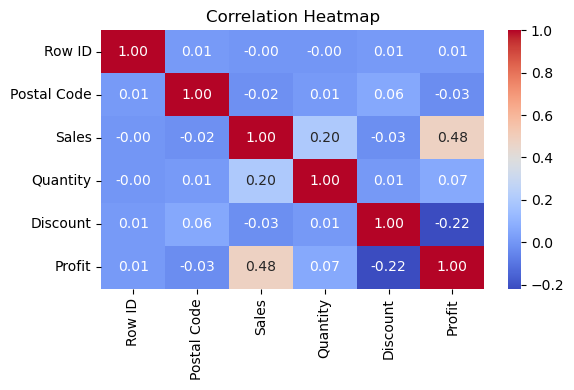

In [67]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()


Final Thoughts

This analysis revealed:
- Key revenue-generating products
- Profitable and non-profitable categories
- Sales trends over time and across regions

The dashboard can help business teams make informed, data-driven decisions.
